**Общая информация**

**Срок сдачи:** 20 марта 2019, 06:00 <br\>
**Штраф за опоздание:** -1 балл после 06:00 20 марта, -2 балла после 06:00 27 марта, -3 балла после 06:00 3 апреля

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack скинуть ссылку в личный чат @alkhamush
Пример ссылки:
https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb 


Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_openml

from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from scipy.spatial import distance
from operator import itemgetter
# %load_ext pycodestyle_magic

In [2]:
# %%pycodestyle
# metric : string or callable, default ‘minkowski’


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        if X.shape[0] != y.shape[0]:
            print("error")
            return
        self._X = np.array(X, dtype=np.float64)
        self._y = np.array(y, dtype=np.int32)
        self.n_classes = np.unique(y).shape[0]
        if self.algorithm == 'kd_tree':
            self.tree = KDTree(self._X)

    def distance(self, X):
        train_dist = (self._X ** 2).sum(axis=1)
        test_dist = (X ** 2).sum(axis=1).reshape(-1, 1)
        dot_dist = 2 * np.dot(X, self._X.T)
        return np.sqrt(train_dist - dot_dist + test_dist)

    def neighbors(self, X):
        X = np.array(X, dtype=np.float64)
        if self.algorithm == 'brute':
            distances = self.distance(X)
            indeces = np.argsort(distances, axis=1)
        if self.algorithm == 'kd_tree':
            indeces = self.tree.query(X,
                                      return_distance=False,
                                      k=self.n_neighbors)
        ineighbors = indeces[:, :self.n_neighbors]
        return self._y[ineighbors]

    def votes(self, x):
        votes = np.zeros(self.n_classes)
        for i in x:
            votes[i] += 1
        return votes.argmax()

    def votes_proba(self, x):
        votes = np.zeros(self.n_classes)
        for i in x:
            votes[i] += 1
        return votes / self.n_neighbors

    def predict(self, X):
        result = self.neighbors(X)
        return np.apply_along_axis(lambda x: self.votes(x), 1, result)

    def predict_proba(self, X):
        result = self.neighbors(X)
        return np.apply_along_axis(lambda x: self.votes_proba(x), 1, result)

    def accuracy(self, y_true, y_pred):
        n = y_true.shape[0]
        return ((y_pred - y_true) == 0).sum() / n

    def score(self, X, y):
        y = np.array(y, dtype=np.int32)
        return self.accuracy(y, self.predict(X))

**IRIS**

In [3]:
iris = datasets.load_iris()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [5]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm = 'brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [6]:
%time clf.fit(X_train, y_train)

CPU times: user 924 µs, sys: 0 ns, total: 924 µs
Wall time: 693 µs


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [7]:
%time my_clf.fit(X_train, y_train)

CPU times: user 181 µs, sys: 0 ns, total: 181 µs
Wall time: 103 µs


In [8]:
%time clf.predict(X_test)

CPU times: user 3.91 ms, sys: 7.43 ms, total: 11.3 ms
Wall time: 19.4 ms


array([2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1])

In [9]:
%time my_clf.predict(X_test)

CPU times: user 1.99 ms, sys: 171 µs, total: 2.16 ms
Wall time: 1.38 ms


array([2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0, 2, 1, 1])

In [10]:
%time clf.predict_proba(X_test)

CPU times: user 4.37 ms, sys: 0 ns, total: 4.37 ms
Wall time: 3.31 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [11]:
%time my_clf.predict_proba(X_test)

CPU times: user 5.47 ms, sys: 0 ns, total: 5.47 ms
Wall time: 3.32 ms


array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [12]:
clf.score(X_test, y_test)

1.0

In [13]:
my_clf.score(X_test, y_test)

1.0

Задание 3

[0.33333333 0.86666667 0.86666667 0.86666667 0.93333333 0.8
 0.93333333 0.86666667 0.93333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.93333333]
Best score with 9 neighbors
Best score: 1.0


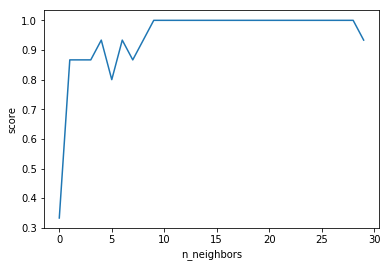

In [45]:
# %%pycodestyle

n_neighbors = 30
scores = np.empty(n_neighbors, dtype=np.float64)
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.1,
                                                    stratify=iris.target)

for i in range(n_neighbors):
    my_clf = MyKNeighborsClassifier(n_neighbors=i)
    my_clf.fit(X_train, y_train)
    scores[i] = my_clf.score(X_test, y_test)

best_count = np.argmax(scores)
print(scores)
print("Best score with {} neighbors".format(best_count))
print("Best score: {}".format(np.max(scores)))
plt.plot(range(n_neighbors), scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

**MNIST**

In [17]:
mnist = fetch_openml('mnist_784')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [19]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='brute')
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [20]:
%time clf.fit(X_train, y_train)

CPU times: user 130 ms, sys: 3.49 ms, total: 134 ms
Wall time: 130 ms


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [21]:
%time my_clf.fit(X_train, y_train)

CPU times: user 235 ms, sys: 245 ms, total: 480 ms
Wall time: 132 ms


In [22]:
%time clf.predict(X_test)

CPU times: user 3.25 s, sys: 305 ms, total: 3.55 s
Wall time: 1.32 s


array(['5', '0', '0', '9', '6', '5', '0', '9', '0', '4', '3', '5', '5',
       '8', '7', '2', '1', '7', '2', '1', '4', '5', '6', '6', '0', '1',
       '2', '4', '3', '8', '9', '2', '4', '8', '5', '8', '0', '1', '7',
       '5', '7', '1', '5', '4', '1', '9', '5', '7', '7', '2', '2', '9',
       '0', '7', '3', '3', '2', '2', '4', '1', '9', '1', '3', '3', '9',
       '5', '4', '6', '4', '6', '5', '4', '0', '8', '9', '2', '4', '4',
       '5', '1', '3', '0', '7', '0', '4', '2', '2', '3', '4', '1', '2',
       '5', '6', '8', '4', '4', '0', '6', '8', '9', '0', '8', '3', '5',
       '9', '1', '5', '4', '6', '3', '6', '3', '0', '9', '2', '4', '0',
       '4', '6', '5', '6', '2', '0', '2', '6', '4', '8', '3', '2', '5',
       '7', '5', '1', '3', '2', '5', '9', '7', '0', '1', '8', '8', '8',
       '9', '4', '0', '6', '7', '6', '4', '8', '0', '6', '1', '3', '1',
       '6', '9', '8', '1', '0', '8', '8', '5', '6', '1', '0', '8', '2',
       '9', '0', '2', '2', '7', '3', '3', '1', '7', '1', '2', '3

In [23]:
%time my_clf.predict(X_test)

CPU times: user 7.82 s, sys: 803 ms, total: 8.63 s
Wall time: 5.23 s


array([5, 0, 0, 9, 6, 5, 0, 9, 0, 4, 3, 5, 5, 8, 7, 2, 1, 7, 2, 1, 4, 5,
       6, 6, 0, 1, 2, 4, 3, 8, 9, 2, 4, 8, 5, 8, 0, 1, 7, 5, 7, 1, 5, 4,
       1, 9, 5, 7, 7, 2, 2, 9, 0, 7, 3, 3, 2, 2, 4, 1, 9, 1, 3, 3, 9, 5,
       4, 6, 4, 6, 5, 4, 0, 8, 9, 2, 4, 4, 5, 1, 3, 0, 7, 0, 4, 2, 2, 3,
       4, 1, 2, 5, 6, 8, 4, 4, 0, 6, 8, 9, 0, 8, 3, 5, 9, 1, 5, 4, 6, 3,
       6, 3, 0, 9, 2, 4, 0, 4, 6, 5, 6, 2, 0, 2, 6, 4, 8, 3, 2, 5, 7, 5,
       1, 3, 2, 5, 9, 7, 0, 1, 8, 8, 8, 9, 4, 0, 6, 7, 6, 4, 8, 0, 6, 1,
       3, 1, 6, 9, 8, 1, 0, 8, 8, 5, 6, 1, 0, 8, 2, 9, 0, 2, 2, 7, 3, 3,
       1, 7, 1, 2, 3, 8, 9, 4, 7, 4, 3, 4, 7, 0, 7, 1, 3, 4, 3, 4, 7, 0,
       0, 9, 9, 1, 1, 1, 9, 5, 1, 4, 0, 3, 7, 8, 7, 6, 8, 1, 6, 7, 9, 2,
       2, 0, 6, 0, 8, 8, 0, 8, 4, 1, 8, 9, 2, 2, 5, 6, 8, 1, 7, 1, 0, 4,
       8, 1, 2, 1, 1, 6, 3, 1, 3, 6, 5, 4, 3, 8, 2, 3, 4, 2, 4, 9, 2, 2,
       4, 7, 6, 1, 1, 3, 6, 7, 1, 4, 6, 2, 1, 7, 1, 7, 1, 9, 5, 0, 1, 5,
       4, 7, 2, 2, 8, 8, 6, 2, 5, 2, 8, 9, 6, 1, 2,

In [24]:
%time clf.predict_proba(X_test)

CPU times: user 2.91 s, sys: 232 ms, total: 3.14 s
Wall time: 1.08 s


array([[0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [25]:
%time my_clf.predict_proba(X_test)

CPU times: user 7.6 s, sys: 887 ms, total: 8.48 s
Wall time: 4.98 s


array([[0. , 0. , 0. , ..., 0. , 0.5, 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [1. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [26]:
clf.score(X_test, y_test)

0.97

In [27]:
my_clf.score(X_test, y_test)

0.97

Задание 4

In [28]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [30]:
%time clf.fit(X_train, y_train)

CPU times: user 28.6 s, sys: 38.4 ms, total: 28.6 s
Wall time: 28.6 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
%time my_clf.fit(X_train, y_train)

CPU times: user 29.9 s, sys: 278 ms, total: 30.2 s
Wall time: 29.3 s


In [32]:
%time clf.predict(X_test)

CPU times: user 1min 15s, sys: 0 ns, total: 1min 15s
Wall time: 1min 15s


array(['7', '8', '7', '3', '4', '3', '4', '8', '1', '3', '0', '6', '2',
       '5', '9', '9', '9', '4', '0', '3', '1', '9', '9', '0', '4', '5',
       '9', '7', '9', '1', '8', '4', '3', '9', '9', '6', '4', '8', '2',
       '7', '0', '9', '0', '0', '2', '5', '0', '0', '3', '2', '3', '0',
       '6', '7', '9', '0', '0', '9', '4', '2', '6', '1', '0', '0', '5',
       '7', '7', '6', '6', '6', '2', '3', '7', '2', '0', '6', '3', '4',
       '7', '2', '3', '9', '4', '2', '5', '0', '3', '8', '7', '3', '4',
       '9', '0', '3', '9', '5', '1', '9', '8', '2', '4', '5', '7', '0',
       '7', '2', '3', '7', '4', '8', '6', '3', '8', '3', '1', '5', '3',
       '1', '4', '7', '1', '8', '2', '3', '0', '8', '3', '7', '7', '5',
       '2', '7', '9', '5', '2', '5', '6', '8', '0', '8', '0', '5', '4',
       '3', '1', '9', '6', '5', '4', '5', '9', '6', '4', '5', '4', '5',
       '3', '9', '0', '4', '6', '5', '5', '8', '9', '2', '6', '8', '4',
       '3', '5', '7', '7', '7', '4', '7', '8', '5', '2', '3', '7

In [33]:
%time my_clf.predict(X_test)

CPU times: user 1min 14s, sys: 5.55 ms, total: 1min 14s
Wall time: 1min 13s


array([7, 8, 7, 3, 4, 3, 4, 8, 1, 3, 0, 6, 2, 5, 9, 9, 9, 4, 0, 3, 1, 9,
       9, 0, 4, 5, 9, 7, 9, 1, 8, 4, 3, 9, 9, 6, 4, 8, 2, 7, 0, 9, 0, 0,
       2, 5, 0, 0, 3, 2, 3, 0, 6, 7, 9, 0, 0, 9, 4, 2, 6, 1, 0, 0, 5, 7,
       7, 6, 6, 6, 2, 3, 7, 2, 0, 6, 3, 4, 7, 2, 3, 9, 4, 2, 5, 0, 3, 8,
       7, 3, 4, 9, 0, 3, 9, 5, 1, 9, 8, 2, 4, 5, 7, 0, 7, 2, 3, 7, 4, 8,
       6, 3, 8, 3, 1, 5, 3, 1, 4, 7, 1, 8, 2, 3, 0, 8, 3, 7, 7, 5, 2, 7,
       9, 5, 2, 5, 6, 8, 0, 8, 0, 5, 4, 3, 1, 9, 6, 5, 4, 5, 9, 6, 4, 5,
       4, 5, 3, 9, 0, 4, 6, 5, 5, 8, 9, 2, 6, 8, 4, 3, 5, 7, 7, 7, 4, 7,
       8, 5, 2, 3, 7, 7, 1, 8, 1, 5, 1, 7, 0, 4, 8, 6, 4, 7, 6, 5, 4, 6,
       7, 5, 6, 7, 1, 8, 2, 7, 2, 4, 7, 9, 4, 0, 5, 4, 9, 2, 8, 5, 2, 9,
       4, 3, 6, 9, 7, 4, 0, 6, 3, 2, 9, 7, 4, 5, 1, 9, 4, 5, 0, 1, 0, 6,
       6, 7, 9, 1, 2, 7, 6, 4, 4, 7, 1, 3, 1, 2, 7, 5, 6, 7, 6, 9, 0, 9,
       0, 4, 5, 2, 3, 2, 8, 5, 5, 4, 4, 2, 1, 1, 9, 3, 2, 0, 9, 6, 4, 5,
       9, 6, 2, 1, 1, 1, 9, 3, 8, 1, 1, 3, 1, 3, 3,

In [34]:
%time clf.predict_proba(X_test)

CPU times: user 1min 14s, sys: 6.82 ms, total: 1min 14s
Wall time: 1min 14s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [35]:
%time my_clf.predict_proba(X_test)

CPU times: user 1min 2s, sys: 0 ns, total: 1min 2s
Wall time: 1min 1s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [36]:
clf.score(X_test, y_test)

0.97

In [37]:
my_clf.score(X_test, y_test)

0.97

Задание 5

In [38]:
# seaborn - Библиотека для визуализации многомерных данных, основанная на matplotlib 
# matplotlib - Библиотека для построения графиков
# train_test_split - Функция библиотеки sklearn, разбивающая выборку на две случайные подвыборки: тренировочную и тестирующую.
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - Функция последовательного(конвеерного) преобразования данных
# StandardScaler (from sklearn.preprocessing import StandardScaler) - Класс для преобразования(Стандартизации) данных так, чтобы распределение имело мат. ожидание 0 и стандартное отклонение 1
# ClassifierMixin - Базовый класс для классификаторов из библиотеки sklearn
# NeighborsBase - Базовый класс для классификатора KNN из библиотеки sklearn
# KNeighborsMixin - Базовый класс для KNN, содержаший в себе методы поиска соседей
# SupervisedIntegerMixin - Класс для обучения с учителем, содержащий метод обучения для целевых меток fit 